<a href="https://colab.research.google.com/github/Chohyungun/Chohyungun/blob/Dais/6%EC%9E%A5_%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6장 차원축소

## 1. 차원축소 개요

- 차원축소: 매우 많은 피처로 구성된 다차원의 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것

- 차원이 증가할 수록 데이터 포인트간의 거리가 기하급수적으로 멀어지고 희소한 구조를 가지게 됨
- 차원이 높아질 수록 예측 성능 저하됨
- 피처가 많을수록 개별 피처간의 상관관계가 높을 가능성이 커서(다중 공선성 문제) 예측 성능이 저하됨

- 다차원의 피처를 차원 축소하여 피처 수를 줄일 때의 이점
1. 직관적으로 데이터 해석 가능
2. 시각적으로 데이터를 압축하여 표현 가능(3차원 이하)
3. 학습 데이터의 크기가 줄어, 학습에 필요한 처리 능력을 줄일 수 있음

- 차원 축소 방법
1. 피처 선택: 종속성이 강한 불필요한 피처는 제거, 데이터의 특징을 잘 나타내는 주요 피처만 선택
2. 피처 추출: 기존 피처를 저차원의 중요 피처로 매핑(압축)하여 추출
  - 함축적인 특성 추출: 기존 피처가 전혀 인지하기 어려웠떤 잠재적인 요소를 추출하는 것을 의미

- 차원 축소 알고리즘 종류
1. PCA
2. SVD
3. NMF

- 차원 축소 쓰임새
1. 많은 픽셀로 이뤄진 이미지 데이터의 이미지 압축, 변환
2. 텍스트 문서의 잠재적 의미 추출 => SVD, NMF

- 피처 선택과 추출의 차이
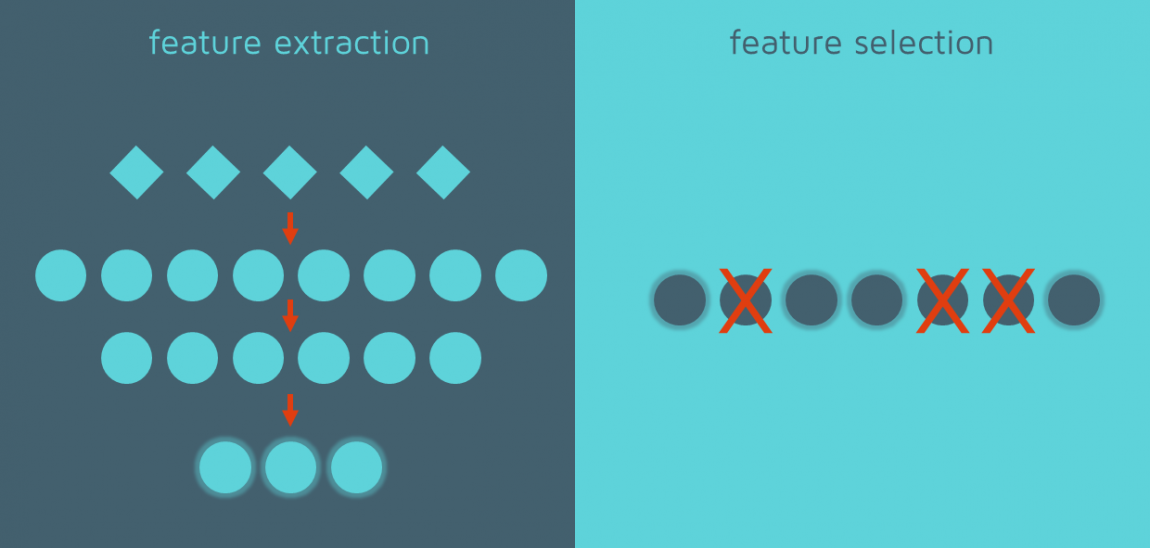

## 2.PCA(Principal Component Analysis)

### 1.PCA 개요

- 쉬운 예시 2차원 => 1차원
1. 하나의 축을 선택하여 점을 몰아넣기 => 데이터가 겹쳐서 loss 발생

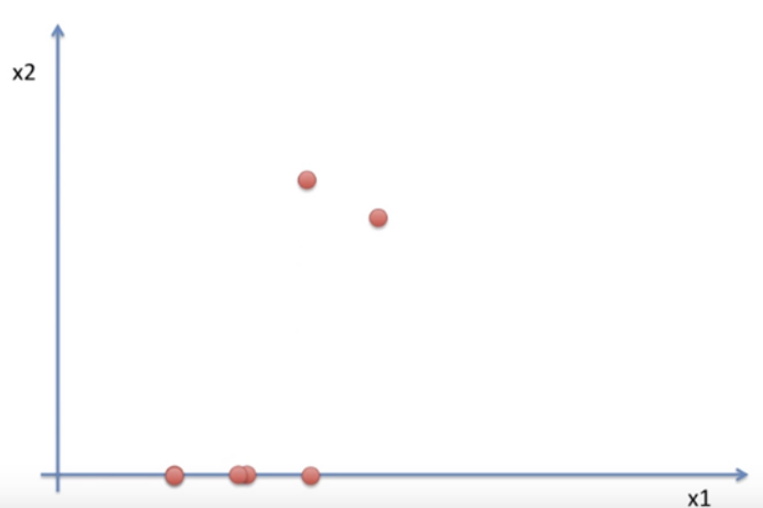


- 정보 loss를 최소화 하기 위하여, 분산이 가장 넓은 지역을 찾기
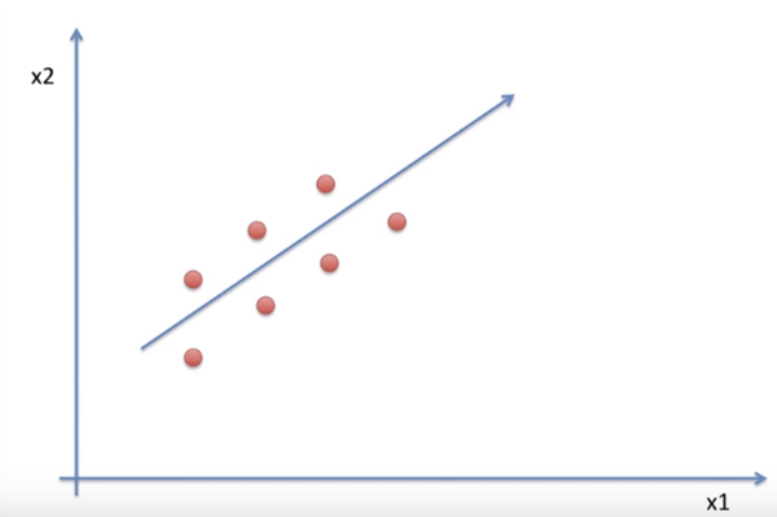

- PC(Princal Component): 주성분; 분산이 가장 넓은 지역
  - 2차원에는 두개 존재(4차원이라면 4개 존재)
  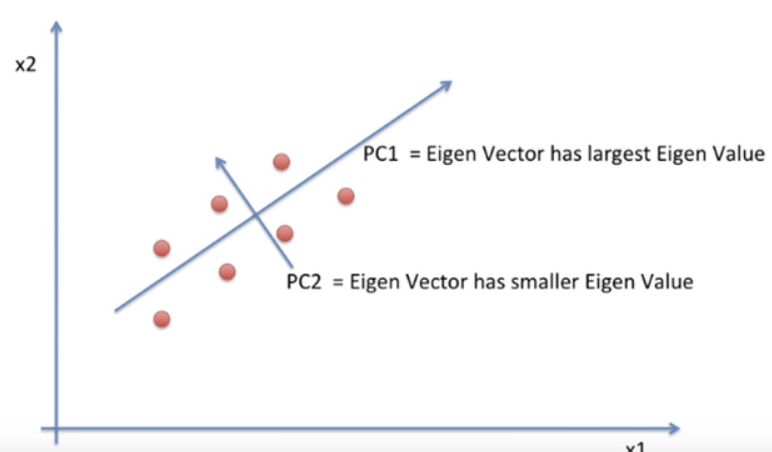


- PCA: 여러 Eigen Vector중 데이터 셋이 가장 넓게 퍼지는 Eigen Vector를 찾아 그것을 기준으로 데이터를 옮겨 차원을 축소하는 방법
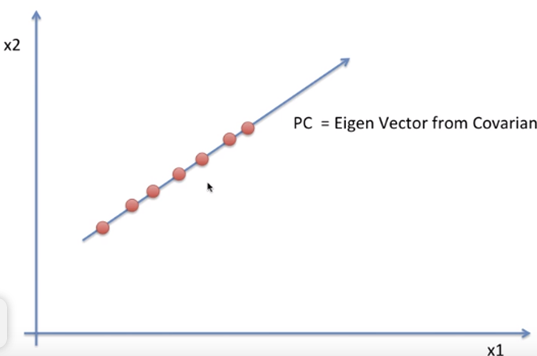

- PCA: 여러 변수간 존재하는 상관관계를 이용하여 이를 대표하는 주성분을 추출하여 차원을 축소하는 기법
  - 기존 데이터 정보 유실 최소화

- PCA 동작
  1. 데이터 변동성이 가장 큰 방향으로 첫번째 벡터 축 생성
  2. 두 번째 축은 이 벡터 축에 직각이 되는 벡터를 축으로 생성
  3. 세 번째 축은 다시 두 번쨰 축과 직각이 되는 벡터를 설정하는 방식으로 축을 생성
  4. 새로운 벡터 축으로 원본 데이터 투영
  5. 벡터 축의 개수만큼의 원본 데이터가 차원 축소 표현
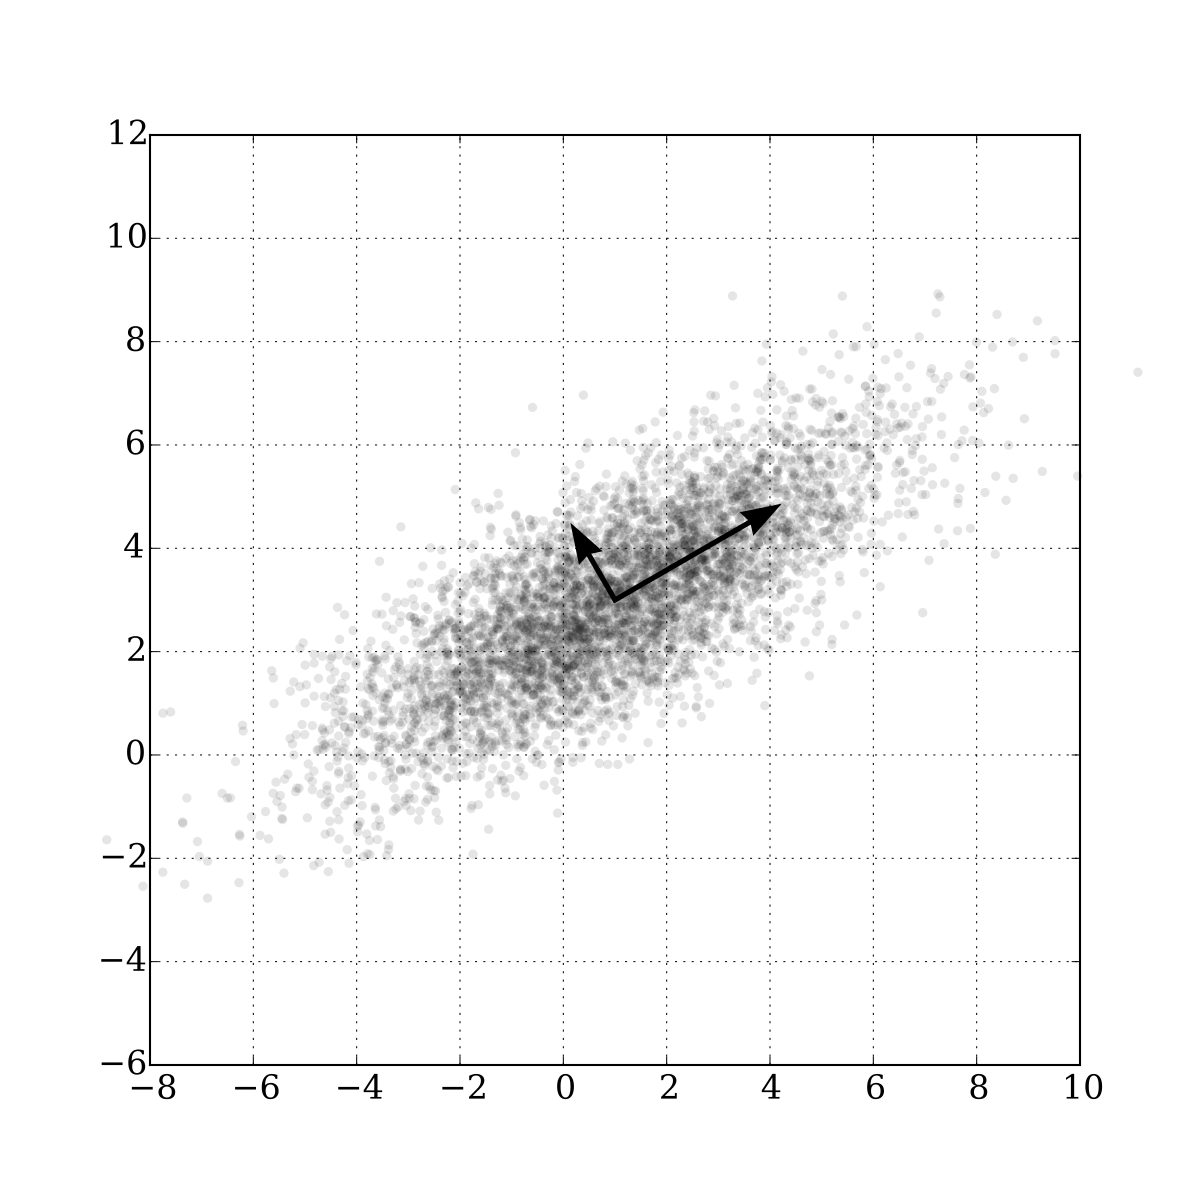

- PCA: 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 설명하는 분석법

- 선형대수 관점에서 해석
  1. 입력데이터의 공분산 행렬을 고유값으로 분해, 도출한 고유벡터에 입력 데이터를 선형 변환
  2. 이 고유벡터는 PCA 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타냄
  3. 고윳값(eigenvalue): 고유벡터의 크기, 입력데이터의 분산

- 선형 변환
  - 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환
  - 특정 벡터를 하나의 공간에서 다른 공간으로 투영하는 개념으로도 볼 수 있음(이 경우에는 행렬을 바로 공간으로 가정)


- 분산
  - 한개의 특정한 변수의 데이터 변동을 의미

- 공분산
  - 두 변수 간의 변동을 의미
  - 공분산 행렬: 여러 변수와 관련된 공분산을 포함하는 정방형 행렬
  - ex) Cov(X,Y)>0 => X가 증가하면 Y도 증가함



In [ ]:
import numpy as np
a = np.array([[3.0,-0.71,-0.24],[-0.71,4.5,0.28],[-0.24,0.28,0.91]]) 
print(a)

[[ 3.   -0.71 -0.24]
 [-0.71  4.5   0.28]
 [-0.24  0.28  0.91]]


- 위 표의 공분산 행렬에서 대각선 원소: 각 변수 X,Y,Z의 분산
- 대각선 이외의 원소: 가능한 모든 변수 쌍 간의 공분산
  - X,Y,Z 분산: 3.0,4.5,0.91
  - X,Y 공분산: -0.71
  - X,Z 공분산: -0.24
  - Y,Z 공분산: 0.28

- 고유벡터: 행렬 A를 곱하더라도 방향이 변하지 않고 크기만 변하는 벡터
  - 여러개가 존재 할 수 있음; 행렬을 분해 하는데 사용됨
  - 정방 행렬은 최대 그 차원의 수만큼의 고유 벡터 소유 가능

- 공분산 행렬
  - 정방행렬 이며 대칭행렬
  - 정방행렬: 열과 행이 같은 행렬
  - 대칭행렬: 대각 원소를 중심으로 원소 값이 대칭되는 행렬 
    - ex) A^T= A
    - 항상 고유 벡터를 직교행렬로, 고유값을 정방 행렬로 대각화 가능
  
- 공분산 행렬 분해
  - 공분산 = 고유벡터 직교 행렬* 고유값 정방 행렬 * 고유벡터 직교 행렬의 전치행렬
  


- 선형대수 기반 PCA 동작: 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해 될 수 있으며, 분해된 고유벡터를 이용하여 입력 데이터를 선형 변환하는 방식
  1. 입력 데이터 세트의 공분산 행렬 생성
  2. 공분산 행렬의 고유벡터와 고유값 계산
  3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수)만큼 고유벡터 추출
  4. 고유값이 가장 큰 순으로 추출된 고유 벡터를 이용해 새로운 입력 데이터 변환

In [ ]:
# Iris 데이터로 실습
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
# 넘파이 데이터 세트를 판다스 DataFrame
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns = columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


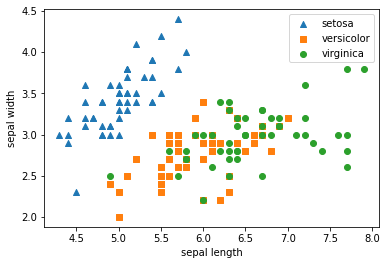

In [ ]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

- Setosa의 경우 sepal width가 3보다 크고 sepal length가 6 이하인 곳에 일정하게 분포되어있다.
- Versicolor와 virginica의 경우에는 sepal width와 sepal length 조건만으로는 분류가 어렵다. => 4개 속성을 2개로 압축한 뒤 2개의 PCA 속성으로 2차원 시각화

In [ ]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용하여 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [ ]:
# 스케일링이 적용된 데이터 세트에 PCA를 적용, 4차원 데이터 => 2차원 데이터변환
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [ ]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target # target 추가
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


- transform(): 원본 데이터 셋을 pca 객체 변수로 변환

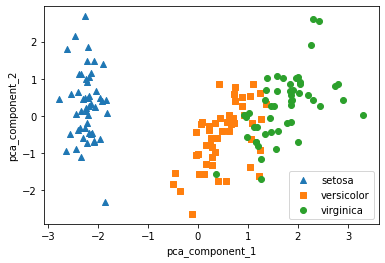

In [ ]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

- 2개의 속성으로 PCA변환된 데이터 세트를 2차원상에서 시각화
- PCA 변환 후에도 pca_component_1 축 기점 Versicolor와 Verginica가 비교적 잘 구분되어짐


In [ ]:
# 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율 확인
print(pca.explained_variance_ratio_)

# 2개의 요소로 원본 데이터의 변동성을 95% 설명할 수 있다. 
#오히려 많으면 과적합이 날 수 있는 걸 생각!! 

[0.72962445 0.22850762]


- explained_variance_ratio_: 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율 확인 가능
- pca_component_1: 72.9%
- pca_component_2: 22.8%
=> PCA를 2개 요소로만 변환해도 원본 데이터의 변동성을 95% 설명 가능

In [ ]:
# 원본 데이터에 랜덤 포레스트 적용

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [ ]:
# PCA 결과에 랜덤 포레스트 적용

pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


- 원본 데이터 대비 PCA가 정확도가 떨어짐
  - 속성 개수가 50% 감소한것을 고려할 시 원본 데이터의 특성을 상당부분 유지하고 있다는 것을 알 수 있음


In [ ]:
# Credit card 실습
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/test/human_activity/card.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [ ]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

- heatmap으로 시각화

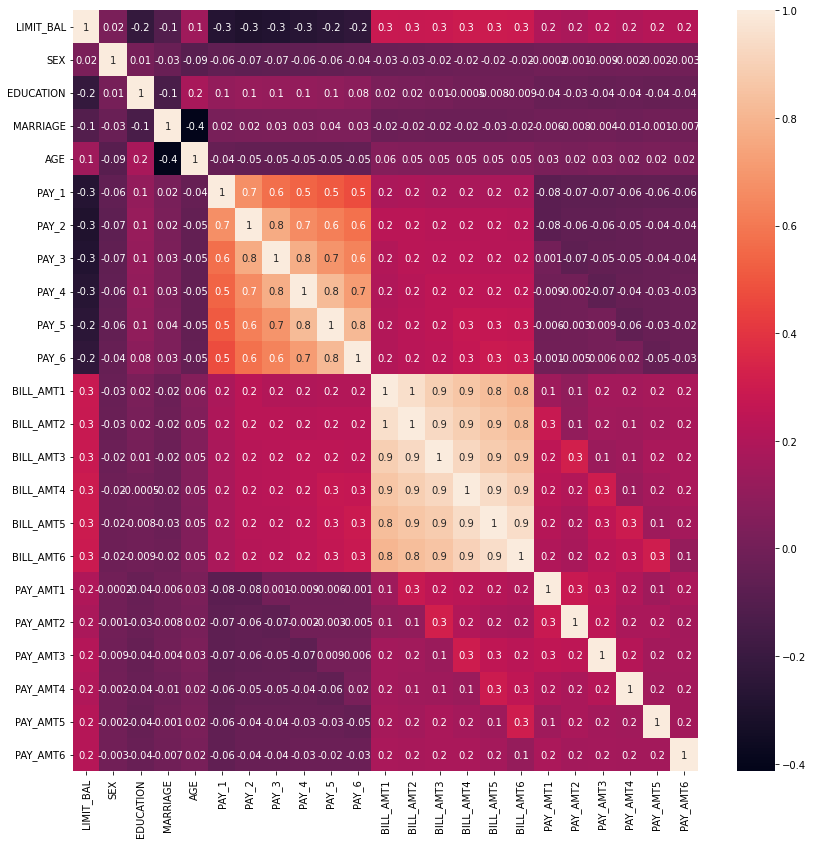

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

- BILL_AMT1 ~ BILL_ATM6 6개의 속성끼리의 상관도가 대부분 0.9 이상으로 매우 높은 것을 알 수 있음
- 0.9보다는 낮지만 PAY_1 ~ PAY_6 까지의 속성 역시 상관도가 매우 높음
- => 높은 상관도를 가진 속성들은 소수의 PCA 만으로도 자연스럽게 이 속성들의 변동성을 수용할 수 있다.

In [ ]:
# PCA를 통해 BILL_AMT1 ~ BILL_ATM6 6개의 속성을 2개의 component로 변환 후 개별 component의 변동성 비율 확인
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:',cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산 위해 fit( ) 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled) 

print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


- 2개의 PCA component 만으로 6개 속성의 변동성을 약 95% 이상 설명할 수 있음
-  PCA 축으로 90%의 변동성을 수용할 정도로 6개의 속성의 상관도가 매우 높음


In [ ]:
# random forest를 통해 원본 dataset과 PCA dataset의 예측 정확도를 비교
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


- 평균 예측 정확도 CV=3일 때 81%


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행. 
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7928 0.7985 0.8037]
PCA 변환 데이터 셋 평균 정확도:0.7983


- PCA 변환 데이터 셋 평균 정확도 CV =3일때: 0.79
- 약 1~2%의 성능 저하 발생

- PCA 응용 분야: Computer Vision, 얼굴 인식(Eigen-face)

## 3.LDA(Linear Discriminant Analysis)

### 1.LDA 개요

- LDA(Linear Discriminant Analysis)
  - 선형 판별법으로 불림
  - PCA와 매우 유사하게 입력 dataset를 저차원 공간에 투영하여 차원을 축소하는 기법

- PCA와의 차이
  - LDA: 지도학습의 분류(Classification)에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소
  => 입력 데이터의 결정 값 클래스를 최대한 분리할 수 있는 축을 찾는다
  - PCA: 입력 데이터의 변동성의 가장 큰 축을 찾음

- LDA 차원 축소 방식
  - 특정 공간상에서 틀래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산(between-class scatter)과 클래스 내부 분산(width-class scatter)의 비율을 최대화하는 방식으로 차원을 축소
  - => 클래스간 분산은 최대한 크게 가져가고, 클래스 내부의 분산은 최대한 작게 가져가는 방식

- PCA와의 차이
 - 공분산 행렬이 아닌 클래스간 분산과 클래스 내부 분산 행렬을 생성한 뒤, 이 행렬에 기반해 교유벡터를 구하고 입력 데이터를 투영

- LDA를 구하는 방법
1. 클래스 내부와 클래스 간 분산 행렬을 구한다. 이 두 개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 feature의 평균 벡터(mean vector)를 기반으로 구한다.
2. 클래스 내부 분산 행렬을 SW, 클래스 간 분산 행렬을 SB 라고 하면 다음 식으로 두 행렬을 고유 벡터로 분해할 수 있다.
3. 고유값이 가장 큰 순으로 K개(LDA 변환 차수만큼) 추출한다.
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환한다.

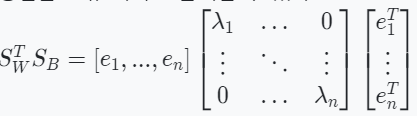


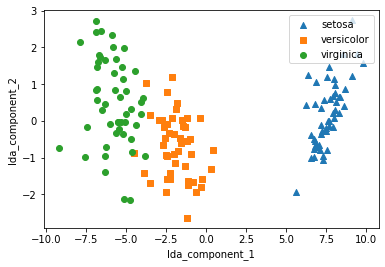

In [ ]:
# iris.df 적용
# 교재와 좀 다른데??
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

### 4.SVD(Singular Value Decomposition)

- SVD: 특이값분해, PCA와 같이 행렬을 대각화하는 방법
  - PCA의 경우 정방행렬만을 고유벡터로 분해할 수 있지만, SVD는 정방행렬 뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있다
  - m x n 크기의 행렬 A를 특이 벡터(singular vector)로 이루어진 행렬 U와 V, 대각 행렬 ∑로 분해
  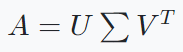
  - 모든 특이 벡터는 서로 직교(orthogonal)하는 성질을 가지며, 대각 행렬 ∑의 대각 성분이 행렬 A의 특이값이다
  - 일반적으로 ∑는 m x n의 크기를 가지기 때문에 ∑의 비대각 부분과 대각 원소중 특이값이 0인 부분도 모두 제거해주며 제거한 부분에 대응되는 U와 V의 원소도 같이 제거하여 차원을 줄인 상태로 SVD를 적용

- Truncated SVD: A의 차원이 m x n일때, U의 차원을 m x p, ∑의 차원을 p x p, V의 차원을 n x p로 분해하는 방법

### 2.SVD를 이용한행렬 분배

In [ ]:
# numpy의 svd 모듈 import
import numpy as np
from numpy.linalg import svd

# 4X4 Random 행렬 a 생성 
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]
(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


- SVD 분해는 numpy.linalg.svd에 파라미터로 원본 행렬을 입력하면 U 행렬, Sigma 행렬, V 전치 행렬 반환
- Sigma 행렬의 경우 행렬의 대각에 위치한 값만 0이 아니고, 그렇지 않은 경우는 모두 0이므로 0이 아닌 값의 경우만 1차원 행렬로 표현

In [ ]:
# 분해된 행렬들을 이용해 다시 원본 행렬로 복원시키기
# Sima를 다시 0 을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


- U,Sigma,Vt를 이용해 원본행렬이 복원
- 데이터 세트가 row간 의존성이 있을때는 시그마 값의 변화와 그에 따른 차원 축소 알아보기
- a 행렬의 3번째 row를 1번째+2번째 row값으로 업데이트, 4번째 row = 1번째 row 로 업데이트

In [ ]:
a[2] = a[0] + a[1]
a[3] = a[0]

# 다시 SVD를 수행하여 Sigma 값 확인 
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[ 0.246  0.583  0.76  -0.15 ]
 [-0.774 -0.017  0.365  0.516]
 [-0.529  0.566 -0.365 -0.516]
 [ 0.246  0.583 -0.395  0.666]]
Sigma Value:
 [2.663 0.807 0.    0.   ]
V transpose matrix:
 [[ 0.164 -0.575 -0.782 -0.173]
 [-0.68   0.194 -0.132 -0.695]
 [-0.389 -0.784  0.479  0.07 ]
 [-0.6    0.13  -0.376  0.694]]


- 이전과 차원은 같지만 Sigma 값 중 2개가 0으로 나타남
  => 선형 독립인 row vector의 개수(rank)가 2개라는 의미

- Sigma에 대응되는 부분만을 가지고 복원하기

In [ ]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
print('U_ matrix:\n',np.round(U_, 3))
print('V_ transpose matrix:\n',np.round(Vt_, 3))
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print('\n',np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
U_ matrix:
 [[ 0.246  0.583]
 [-0.774 -0.017]
 [-0.529  0.566]
 [ 0.246  0.583]]
V_ transpose matrix:
 [[ 0.164 -0.575 -0.782 -0.173]
 [-0.68   0.194 -0.132 -0.695]]

 [[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


- Truncated SVD를 이용한 행렬 분해
  - 시그마 행렬에 있는 대각 원소, 즉 특이값 상위 일부 데이터만 추출하여 분해하는 방식
  - 인위적으로 더 작은 차원의 U,sigma,V^T로 분해 하기 때문에 복원 불능
  - 데이터 정보가 압축되어 분해되지만, 상당한 수준의 원본 행렬 근사
  - 원래 차원의 차수에 가깝게 Truncate할수록 원본 행렬에 가깝게 복원 가능

- Truncated SVD는 numpy가 아닌 scipy에서만 지원
- 임의의 행렬에 대해 우선 Normal SVD로 분해해본 뒤, 다시 Truncated SVD로 분해하여 Normal SVD와 Truncated SVD의 차원을 비교
  - 그 뒤 Truncated SVD로 분해하였을 때 복원이 어떻게 되는지 확인

In [ ]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt 의 차원 확인 
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행. 
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

- n_components의 설정에 따라 차원수가 다르게 분해되며, Truncated SVD로 분해할 경우 완벽하지 않고 근사적으로 복원

### 3. 사이킷런 TruncatedSVD 클래스를 이용한 변환

- 사이킷런의 TruncatedSVD 클래스는 PCA 클래스와 유사하게 fit()과 transform()을 호출해 몇 개의 주요 component로 차원을 축소하여 변환

Text(0, 0.5, 'TruncatedSVD Component 2')

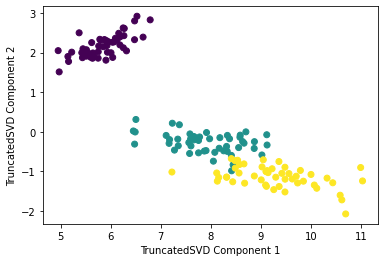

In [ ]:
# iris 데이터셋을 이용한 변환
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

- TruncatedSVD로 변환된 iris dataset도 PCA의 경우와 유사하게 변환되며 어느 정도 클러스터링이 가능할 정도로 각 변환되었다
- 스케일링을 한 뒤에 TruncatedSVD와 PCA 변환을 비교하기

Text(0.5, 1.0, 'PCA Transformed')

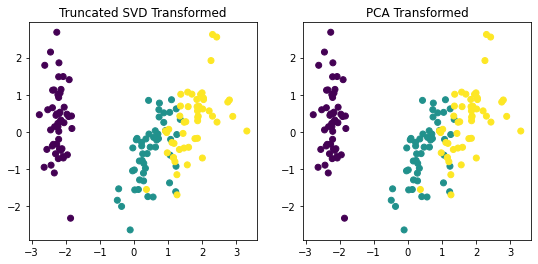

In [ ]:
from sklearn.preprocessing import StandardScaler

# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행 
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현 
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

- 두 개의 변환 행렬 값과 원복 속성별 컴포넌트 비율값을 실제로 서로 비교해보니 모두 0에 가까운 값으로 2개의 변환이 서로 동일함.
  - => 즉, 데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행함 ( PCA가 SVD 알고리즘으로 구현된다 )
  - 하지만 PCA는 밀집 행렬에 대한 변환만 가능하며 SVD는 희소 행렬에 대한 변환도 가능하다

- SVD 사용분야
  - 이미지 압축을 통한 패턴 인식과 신호 처리 분야에 사용
  
- SVD 알고리즘
  - 텍스트의 토픽 모델링 기법인 LSA ( Latent Semantic Analysis )의 기반 알고리즘

## 5. NMF ( Non-Negative Matrix Factorization )

- NMF: Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사 방식의 변형.
  - NMF는 원본 행렬 내의 모든 원소 값이 모두 양수라는 게 보장되면 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭
  - 원본 행렬 V를 행렬 W와 H로 근사해 분해할 수 있다
  - 이 때 W는 일반적으로 길고 가는 행렬( 원본 행렬의 행 크기와 같다 )
  - H는 작고 넓은 행렬 ( 원본 행렬의 열 크기와 같다 )로 분해됨
  
- NMF로 분해된 행렬: 잠재 요소를 특성으로 가지게 됨
  - w는 원본 행에 대해서 이 잠재 요소의 값이 얼마나 되는지에 대응하고
  - H는 이 잠재 요소가 원본 열로 어떻게 구성됐는지를 나타내는 행렬이 된다

- SVD와 유사하게 차원 축소를 통한 잠재 요소 도출로 이미지 변환, 압축, 토픽 도출 등의 영역에서 사용

- 사이킷런 NMF 클래스에서 지원

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


Text(0, 0.5, 'NMF Component 2')

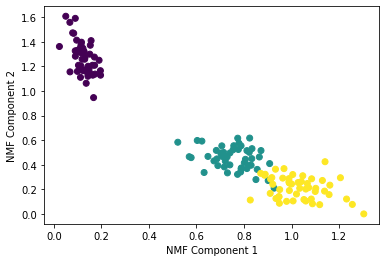

In [ ]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

- NMF도 SVD와 유사하게 이미지 압축을 통한 패턴 인식, 텍스트의 토픽 모델링 기법, 문서 유사도 및 클러스터링에 잘 사용됨
- 영화 추천과 같은 추천 영역에 활발하게 적용
- 사용자의 상품 평가 데이터 세트인 사용자 평가 순위 데이터 세트를 행렬 분해 기법을 통해 분해
- 사용자가 평가하지 않은 상품에 대한 잠재적인 요소를 추출해 이를 통해 평가 순위를 예측하고, 높은 순위로 예측된 상품을 추천해주는 방식( 잠재 요소 기반의 추천 방식 )

### 6.정리

1. 차원 축소 알고리즘은 많은 차원을 가지는 이미지나 텍스트에서 활발하게 사용된다.
2. PCA는 입력 데이터의 변동성이 가장 큰 축을 구하고, 다시 이 축에 직각인 축을 반복적으로 축소하려는 차원 개수만큼 구한 뒤 입력 데이터를 이 축들에 투여해 차원을 축소하는 방식이다.
3. LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는 방식으로 차원을 축소한다.
4. SVD와 NMF는 매우 많은 피처 데이터를 가진 고차원 행렬을 두 개의 저차원 행렬로 분리하는 행렬 분해 기법이다.